In [28]:
import numpy as np
import pandas as pd
from pprint import pprint
from sklearn.datasets import fetch_20newsgroups
from sentence_transformers import SentenceTransformer
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
categories = ['alt.atheism', 'soc.religion.christian',
              'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(
    subset='train',
    categories=categories,
    shuffle=True,
    random_state=42
)
twenty_test = fetch_20newsgroups(
    subset='test',
    categories=categories,
    shuffle=True,
    random_state=42
)

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import make_pipeline

vec = CountVectorizer()
clf = LogisticRegressionCV()
pipe = make_pipeline(vec, clf)
pipe.fit(twenty_train.data, twenty_train.target);

/home/oren/projects/humans_thoughts/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/oren/projects/humans_thoughts/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

In [13]:
pprint(twenty_train.data[:2])

['From: sd345@city.ac.uk (Michael Collier)\n'
 'Subject: Converting images to HP LaserJet III?\n'
 'Nntp-Posting-Host: hampton\n'
 'Organization: The City University\n'
 'Lines: 14\n'
 '\n'
 'Does anyone know of a good way (standard PC application/PD utility) to\n'
 'convert tif/img/tga files into LaserJet III format.  We would also like to\n'
 'do the same, converting to HPGL (HP plotter) files.\n'
 '\n'
 'Please email any response.\n'
 '\n'
 'Is this the correct group?\n'
 '\n'
 'Thanks in advance.  Michael.\n'
 '-- \n'
 'Michael Collier (Programmer)                 The Computer Unit,\n'
 'Email: M.P.Collier@uk.ac.city                The City University,\n'
 'Tel: 071 477-8000 x3769                      London,\n'
 'Fax: 071 477-8565                            EC1V 0HB.\n',
 'From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\n'
 'Subject: help: Splitting a trimming region along a mesh \n'
 'Organization: University Of Kentucky, Dept. of Math Sciences\n'
 'Lines: 28\n'
 '\n'
 '\n'
 '\n'
 

In [12]:
pprint(twenty_train.target[:4])

array([1, 1, 3, 3])


In [16]:
twenty_test.target_names[1]

'comp.graphics'

In [18]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

In [19]:
X = model.encode(twenty_train.data)

In [24]:
umap = UMAP()
X_tfm = umap.fit_transform(X)

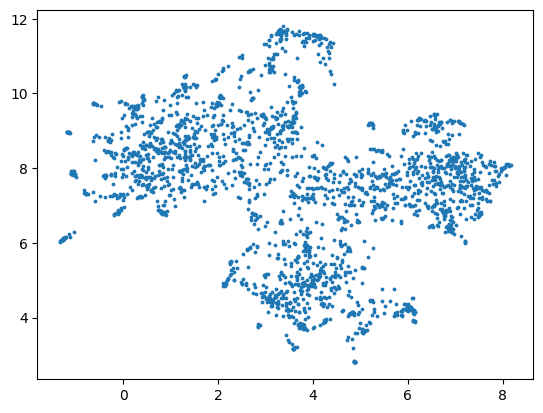

In [27]:
plt.scatter(X_tfm[:, 0], X_tfm[:, 1], s=3);

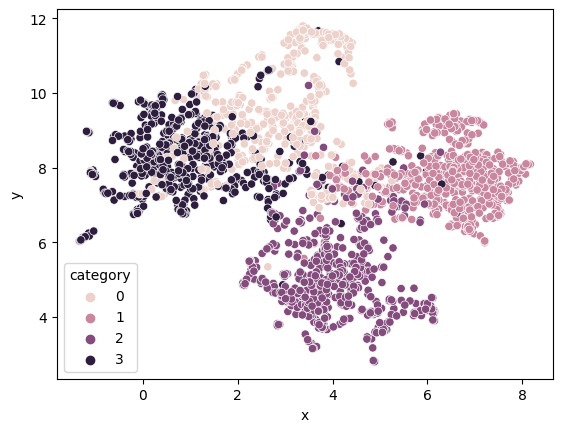

In [33]:
df = (
    pd.DataFrame(X_tfm, columns=['x', 'y'])
    .assign(
        category=twenty_train.target
    )
)

sns.scatterplot(df, x='x', y='y', hue='category');

In [34]:
(
    df
    .drop(['category'], axis=1)
    .assign(
        text=twenty_train.data
    )
).to_csv("ready.csv", index=False)